In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
numbers_mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = numbers_mnist.load_data()

In [6]:
y_train.shape

(60000,)

In [19]:
x_train = tf.keras.utils.normalize(x_train, axis=1)

x_test = tf.keras.utils.normalize(x_test, axis=1)

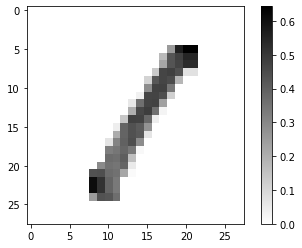

In [37]:
plt.figure()
plt.imshow(x_train[3], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [40]:
model.compile(optimizer="SGD",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [41]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0403 - accuracy: 0.9884
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0360 - accuracy: 0.9902
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0341 - accuracy: 0.9907


In [42]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.9750
0.08409825712442398 0.9750000238418579


In [43]:
model.save('number_reader.model')

INFO:tensorflow:Assets written to: number_reader.model\assets


In [44]:
new_model = tf.keras.models.load_model('number_reader.model')

In [45]:
predictions = new_model.predict([x_test])

In [46]:
print(predictions)

[[1.8851821e-10 9.6696979e-08 3.5329329e-05 ... 9.9995434e-01
  4.1782175e-10 4.7416940e-08]
 [1.9632868e-08 7.4558170e-04 9.9925309e-01 ... 2.1819102e-09
  2.7096014e-08 8.4712521e-13]
 [7.7671395e-08 9.9975044e-01 7.1306563e-06 ... 1.0352938e-04
  1.1392144e-04 1.4336626e-06]
 ...
 [6.9824471e-09 1.3561430e-07 3.4066698e-08 ... 1.5099876e-04
  9.2592512e-07 9.1374081e-05]
 [4.2427022e-05 2.7885233e-07 1.9225108e-06 ... 6.9595933e-07
  1.0295967e-02 5.9632683e-08]
 [2.4499801e-07 8.1863440e-09 1.0868486e-07 ... 4.9371496e-11
  7.5575144e-08 8.0346917e-11]]


In [47]:
print(np.argmax(predictions[9]))

9


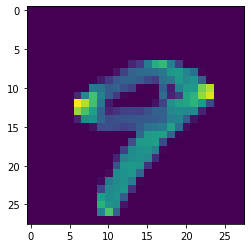

In [48]:
plt.imshow(x_test[9])
plt.show()